# 1.Bussniess Understanding
For this we need to understand what is important to a person searching for a new job, things such as salary, salary growth, and jobsatisfaction in what they do are important factors that determine which location is a better choice. This is an Udacity Nanodegree project.I was interested in using Stackoverflow Developer Survey Data to better understand:

1. Which location has the highest salary growth?
2. Which location has the highest salary?
3. which location has the highest jobsatisfaction?

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt# mostly used for visualization purposes 
%matplotlib inline
import collections as cl
from datetime import datetime

In [9]:
# importing data set using pandas
df = pd.read_csv('../input/so-survey-2017/survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


In [11]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


# assesment
*   To select the columns that we will use in the study
*   Filter the data of the respondants we are not interested in (students, part-time, etc.)
*   Create a column with the location of the respondant, be it North America or Europe
*   Leave the Respondant value as a string, since is the id and we dont want that data as numerical
*   Map the YearsCodedJob variable into an easier to read value as to be able to graph it better
*   We need to deal with the missing value

# 2. Data Cleaning

In [19]:
# We select our variables of interest, since they are the ones we want to asses
columns = ['Respondent','Country', 'YearsCodedJob', 'FormalEducation', 'CareerSatisfaction', 'Salary']

# We apply our filters
data = df[df['Professional']=='Professional developer']
data = data[data['EmploymentStatus']=='Employed full-time']

# we filter our columns of interest
data = data[columns]


In [21]:

data.head()


,Respondent,Country,YearsCodedJob,FormalEducation,CareerSatisfaction,Salary
2,3,United Kingdom,20 or more years,Bachelor's degree,8.0,113750.0
4,5,Switzerland,10 to 11 years,Master's degree,6.0,NaN
7,8,Poland,7 to 8 years,Master's degree,7.0,NaN
8,9,Colombia,7 to 8 years,Bachelor's degree,6.0,NaN
11,12,Canada,8 to 9 years,Bachelor's degree,8.0,NaN


Then, we shall create our Location variable, which will indicate if the data point comes from North America or Europe

code

In [22]:
Europe = ['Liechtenstein', 'Switzerland','Iceland', 'Norway','Denmark','Ireland', 'United Kingdom', 'Germany',
          'Netherlands', 'Sweden', 'Luxembourg', 'Austria','Finland', 'France', 'Belgium', 'Spain', 'Italy','Poland']

North_America = ['United States', 'Canada']
    
#Add a new catagory seperating to western and eastern
data['Location'] = data['Country'].apply(lambda x: 'Europe' if x in Europe 
                                         else ('North_America' if x in North_America else 'Other'))

In [23]:
data.head()

,Respondent,Country,YearsCodedJob,FormalEducation,CareerSatisfaction,Salary,Location
2,3,United Kingdom,20 or more years,Bachelor's degree,8.0,113750.0,Europe
4,5,Switzerland,10 to 11 years,Master's degree,6.0,NaN,Europe
7,8,Poland,7 to 8 years,Master's degree,7.0,NaN,Europe
8,9,Colombia,7 to 8 years,Bachelor's degree,6.0,NaN,Other
11,12,Canada,8 to 9 years,Bachelor's degree,8.0,NaN,North_America


Now that we created the location value, we can filter out any respondant that is not in those countries of interest

Code

In [29]:
data = data[data['Location'].isin(["Europe","North_America"])]


In [30]:
data.Location.unique()

array(['Europe', 'North_America'], dtype=object)

In [31]:
years = {'Less than a year' : 0,
            '1 to 2 years' : 1, 
            '2 to 3 years' : 2,
            '3 to 4 years' : 3, 
            '4 to 5 years' : 4, 
            '5 to 6 years' : 5, 
            '6 to 7 years' : 6, 
            '7 to 8 years' : 7, 
            '8 to 9 years' : 8, 
            '9 to 10 years' : 9, 
            '10 to 11 years' : 10, 
            '11 to 12 years' : 11, 
            '12 to 13 years' : 12,
            '13 to 14 years' : 13, 
            '14 to 15 years' : 14, 
            '15 to 16 years' : 15, 
            '16 to 17 years' : 16,
            '17 to 18 years' : 17, 
            '18 to 19 years' : 18, 
            '19 to 20 years' : 19, 
            '20 or more years' : 20,
            np.nan : -1}

data = data.reset_index()
data['YearsCodedJob'] = data['YearsCodedJob'].apply(lambda x: years[x])
data['YearsCodedJob'] = pd.to_numeric(data['YearsCodedJob'])

# We erase the points with -1 since they were the placeholders for -1
data = data[data['YearsCodedJob'] != -1]

In [32]:
data.YearsCodedJob.unique()

array([20, 10,  7,  8, 15,  3,  9, 16,  0,  2,  5,  4,  1, 12, 14, 13, 18,
       17, 11,  6, 19])

For missing values, since we are working with 2 target variables, salary and job satisfaction

In [33]:
salary = data[data['Salary'].notnull()]
salary.drop('CareerSatisfaction', axis=1, inplace=True)

CareerSatisfaction = data[data['CareerSatisfaction'].notnull()]
CareerSatisfaction.drop('Salary', axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8913 entries, 0 to 18891
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            8913 non-null   int64  
 1   Respondent       8913 non-null   int64  
 2   Country          8913 non-null   object 
 3   YearsCodedJob    8913 non-null   int64  
 4   FormalEducation  8913 non-null   object 
 5   Salary           8913 non-null   float64
 6   Location         8913 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 557.1+ KB


In [38]:

CareerSatisfaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18612 entries, 0 to 18891
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               18612 non-null  int64  
 1   Respondent          18612 non-null  int64  
 2   Country             18612 non-null  object 
 3   YearsCodedJob       18612 non-null  int64  
 4   FormalEducation     18612 non-null  object 
 5   CareerSatisfaction  18612 non-null  float64
 6   Location            18612 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 1.1+ MB


# 3.Analysis and Visualization 
Question
1. Which location has the highest salary?
Now, as a person looking for a new place to work, salary is one of the main concerns, so lets investigate which of the 2 continents has a higher salary in general

In [41]:

columnscolumns  ==  [['Country''Country', 'YearsCodedJob', 'FormalEducation','Salary', 'Location']                                                                   
salary = salary[columns]

SyntaxError: invalid syntax (<ipython-input-41-76ccbac3518f>, line 2)

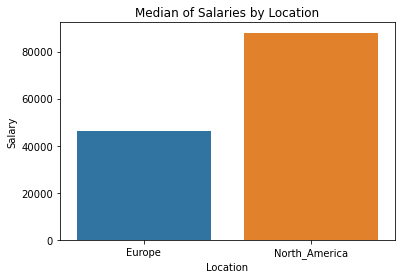

In [42]:
salary_plot = salary.groupby(['Location'])['Salary'].median().reset_index()

sns.barplot(x = 'Location', y = 'Salary', data = salary_plot)
plt.title('Median of Salaries by Location');

We can easily see that North America has a higher salary than Europe, but, that may change if you have a higher education.

Since we are also thinking of doing a master's degree in the near future, we are curious to see how much does formal education change your salary in each continent

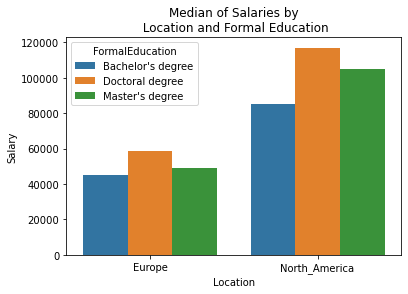

In [43]:
salary_academics = salary.copy()

salary_academics = salary_academics[salary_academics['FormalEducation'].isin(["Bachelor's degree","Master's degree",
                                                                              'Doctoral degree'])]
          

salary_academics_plot = salary_academics.groupby(['Location','FormalEducation'])['Salary'].median().reset_index()

sns.barplot(x = 'Location', y = 'Salary', hue = 'FormalEducation', data = salary_academics_plot)
plt.title('Median of Salaries by\n Location and Formal Education');

 
2.  Which location has the highest salary growth?
But that is not all that is important, since we are planning on living for a long time on our new home, so we need to have a clear idea if salaries experience growth as we have more and more experience at our jobs

In [44]:
salary_years = salary.copy()


# Select our columns of interest
columns = ['YearsCodedJob','Salary', 'Location']
salary_years = salary_years[columns]

# We drop data that does not have a YearsCodedJob value, remember that -1 was a null value
salary_years = salary_years[salary_years['YearsCodedJob'] != -1]

In [47]:
# As before, to protect ourselfs from outliers, we will use median as our base of measure
salary_years = salary_years.groupby(['Location','YearsCodedJob'])['Salary'].median().reset_index()

# Since we want to calculate change, it would be easier if we separate the continents
sy_Europe = salary_years[salary_years['Location'] == 'Europe']
sy_North = salary_years[salary_years['Location'] == 'North_America']

# We want the total change over time, si we calculate the cumulative change rate
sy_Europe['change'] = sy_Europe['Salary'].pct_change().cumsum()
sy_North['change'] = sy_North['Salary'].pct_change().cumsum() 

# We join both data frames 
salary_years = pd.concat([sy_Europe,sy_North])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


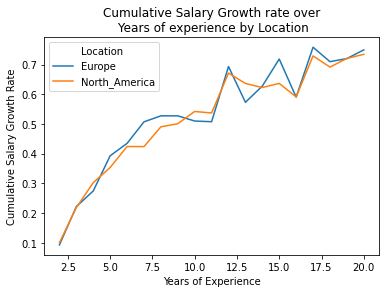

In [48]:
# We erase the starting points of each continent since the value is nan
salary_years = salary_years[salary_years['YearsCodedJob'] != 0] 

ax = sns.lineplot(x="YearsCodedJob", y="change", hue="Location", data=salary_years)
plt.title('Cumulative Salary Growth rate over\n Years of experience by Location')
plt.ylabel('Cumulative Salary Growth Rate')
plt.xlabel('Years of Experience');

3. which location has the highest career satisfaction?

In [49]:

columns = ['YearsCodedJob', 'CareerSatisfaction','Location']
CareerSatisfaction = CareerSatisfaction[columns]

CareerSatisfaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18612 entries, 0 to 18891
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearsCodedJob       18612 non-null  int64  
 1   CareerSatisfaction  18612 non-null  float64
 2   Location            18612 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 581.6+ KB


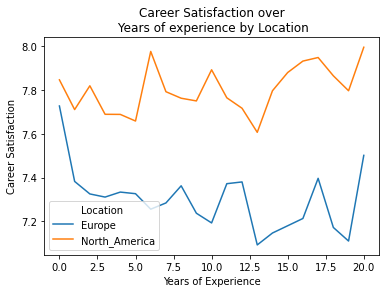

In [50]:
# We group our data by years coded and obtain the mean of the satisfaction
CareerSatisfaction = CareerSatisfaction.groupby(['Location','YearsCodedJob'])['CareerSatisfaction'].mean().reset_index()

sns.lineplot(x="YearsCodedJob", y="CareerSatisfaction", hue="Location", data=CareerSatisfaction)
plt.ylabel('Career Satisfaction')
plt.xlabel('Years of Experience')
plt.title('Career Satisfaction over\n Years of experience by Location');
plt.legend(loc=3);

We can see that both locations start with a pretty similar career satisfaction, but Europe has a drop at the firts year while North America has a stable behavior, with also a drop, but very small and almost right away, has an increase of satisfaction